# Proyek Analisis Data: E-Commerce Public Dataset
    Nama: Rais Hannan Rizanto
    Email: rizantohannan@gmail.com
    Id Dicoding: -


# Menentukan Pertanyaan Bisnis
    pertanyaan 1: Menentukan perbandingan tingkat pembelian tiap kota
    pertanyaan 2: Menentukan banyaknya status pembelian

Ini adalah beberapa library yang saya butuhkan untuk melakukan analisis data

In [1]:
#PERSIAPAN LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# DATA WRAGLING

# GATHERING DATA

In [2]:
customers_df = pd.read_csv("E:\CODINGAN\Pyhton\Dicoding\E-Commerce Public Dataset\customers_dataset.csv")

In [3]:
geolocation_df = pd.read_csv("E:\CODINGAN\Pyhton\Dicoding\E-Commerce Public Dataset\geolocation_dataset.csv")

In [4]:
order_items_df = pd.read_csv("E:\CODINGAN\Pyhton\Dicoding\E-Commerce Public Dataset\order_items_dataset.csv")

In [5]:
order_payments_df = pd.read_csv("E:\CODINGAN\Pyhton\Dicoding\E-Commerce Public Dataset\order_payments_dataset.csv")

In [6]:
order_reviews_df = pd.read_csv("E:\CODINGAN\Pyhton\Dicoding\E-Commerce Public Dataset\order_reviews_dataset.csv")

In [7]:
orders_df = pd.read_csv("E:\CODINGAN\Pyhton\Dicoding\E-Commerce Public Dataset\orders_dataset.csv")

In [8]:
product_category_name_df = pd.read_csv("E:\CODINGAN\Pyhton\Dicoding\E-Commerce Public Dataset\product_category_name_translation.csv")

In [9]:
product_df = pd.read_csv("E:\CODINGAN\Pyhton\Dicoding\E-Commerce Public Dataset\products_dataset.csv")

In [10]:
sellers_df = pd.read_csv("E:\CODINGAN\Pyhton\Dicoding\E-Commerce Public Dataset\sellers_dataset.csv")

# ASSESING AND CLEANING DATA 'customers_df'

In [11]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [12]:
#Menghapus missing value
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
customers_df.duplicated().sum()

0

# ASSESING AND CLEANING DATA 'geolocation_df'

In [14]:
#ASSESING DATA + CLEANING GEOLOCATION_DF
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [15]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [16]:
geolocation_df.duplicated().sum()

261831

In [17]:
geolocation_df.drop_duplicates(inplace=True)

# ASSESING AND CLEANING DATA 'order_time_df'

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
order_items_df.duplicated().sum()

0

# ASSESING AND CLEANING DATA 'order_payments_df'

In [21]:
#ASSESING DATA + CLEANING ORDER_PAYMENTS_DF
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


# ASSESING AND CLEANING DATA 'order_reviews_df'

In [23]:
#ASSESING DATA + CLEANING ORDER_REVIEWS_DF
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [24]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
order_reviews_df['review_comment_title']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
99219    NaN
99220    NaN
99221    NaN
99222    NaN
99223    NaN
Name: review_comment_title, Length: 99224, dtype: object

In [26]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [27]:
column = ['review_creation_date','review_answer_timestamp']
for data in column:
    order_reviews_df[data] = pd.to_datetime(order_reviews_df[data])

In [28]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [29]:
order_reviews_df['review_comment_message']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                    Recebi bem antes do prazo estipulado.
4        Parabéns lojas lannister adorei comprar pela I...
                               ...                        
99219                                                  NaN
99220                                                  NaN
99221    Excelente mochila, entrega super rápida. Super...
99222                                                  NaN
99223    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 99224, dtype: object

In [30]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [31]:
order_reviews_df[order_reviews_df.review_comment_title.isnull()].head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17,2017-05-18 12:05:37
10,c9cfd2d5ab5911836ababae136c3a10c,cdf9aa68e72324eeb25c7de974696ee2,5,NaN,NaN,2017-12-23,2017-12-26 14:36:03


In [32]:
order_reviews_df['review_comment_title'].value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [33]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [34]:
column = ['review_creation_date', 'review_answer_timestamp']
for casting_date in column:
    order_reviews_df[casting_date] = pd.to_datetime(order_reviews_df[casting_date])

In [35]:
order_reviews_df.describe()

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


In [36]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [37]:
order_reviews_df[order_reviews_df['review_comment_title'].isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [38]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [39]:
order_reviews_df['review_comment_title'].replace({'recomendo':'Recomendo'})

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
99219    NaN
99220    NaN
99221    NaN
99222    NaN
99223    NaN
Name: review_comment_title, Length: 99224, dtype: object

In [40]:
order_reviews_df.review_comment_title.replace('recomendo', 'Recomendo', inplace=True)

In [41]:
data_recomendo = order_reviews_df[order_reviews_df['review_comment_title'] == 'Recomendo']

In [42]:
order_reviews_df.review_comment_title.fillna(value='Recomendo', inplace=True)

In [43]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [44]:
order_reviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [45]:
order_reviews_df.review_comment_message.fillna(value='Prefer not to say', inplace=True)

In [46]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


# ASSESING AND CLEANING DATA 'orders_df'

In [47]:
#ASSESING DATA + CLEANING ORDERS_DF
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [48]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [49]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [50]:
column = ['order_purchase_timestamp',
          'order_approved_at',
          'order_delivered_carrier_date',
          'order_delivered_customer_date',
          'order_estimated_delivery_date']

for casting_values in column:
    orders_df[casting_values] = pd.to_datetime(orders_df[casting_values]).dt.date

In [51]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09,2017-03-10,2017-03-17,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15


In [52]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [53]:
orders_df.describe(include='all')    

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,634,611,547,645,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-11-24,2018-04-24,2017-11-28,2018-08-27,2017-12-20
freq,1,1,96478,1176,990,707,446,522


In [54]:
orders_df.order_purchase_timestamp.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Name: order_purchase_timestamp, Length: 99441, dtype: bool

In [55]:
orders_df.order_purchase_timestamp.duplicated().sum()

98807

In [56]:
orders_df.drop_duplicates(inplace=True)

In [57]:
orders_df.duplicated().sum()

0

In [58]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [59]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [60]:
orders_df[orders_df['order_approved_at'].notnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09,2017-03-10,2017-03-17,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15


In [61]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [62]:
column = ['order_purchase_timestamp',
          'order_approved_at',
          'order_delivered_carrier_date',
          'order_delivered_customer_date',
          'order_estimated_delivery_date']

for casting_values in column:
    orders_df[casting_values] = pd.to_datetime(orders_df[casting_values])

mounthly = orders_df.resample(rule='M', on='order_approved_at').agg({
    'order_id':'nunique',
    'order_status':'count'
})
mounthly.index = mounthly.index.strftime('%B')
mounthly = mounthly.reset_index()

mounthly

,order_approved_at,order_id,order_status
0,September,1,1
1,October,320,320
2,November,0,0
3,December,1,1
4,January,760,760
5,February,1765,1765
6,March,2689,2689
7,April,2374,2374
8,May,3693,3693
9,June,3252,3252


In [63]:
orders_df[orders_df['order_approved_at'].notnull()].sort_values(by='order_purchase_timestamp')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,2016-10-07,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13,2016-10-07,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15,2016-11-07,2016-11-09,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06,NaT,NaT,2016-10-25
...,...,...,...,...,...,...,...,...
5774,d70442bc5e3cb7438da497cc6a210f80,10a79ef2783cae3d8d678e85fde235ac,delivered,2018-08-29,2018-08-29,2018-08-29,2018-08-30,2018-09-04
30077,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29,2018-08-29,2018-08-29,2018-08-30,2018-09-04
88412,912859fef5a0bd5059b6d48fa79d121a,b8c19e70d00f6927388e4f31c923d785,delivered,2018-08-29,2018-08-29,2018-08-29,2018-08-30,2018-09-04
69678,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29,2018-08-29,2018-08-29,2018-08-30,2018-09-03


In [64]:
orders_df[orders_df['order_approved_at'].isnull()].sort_values(by='order_purchase_timestamp')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3056,ddaec6fff982b13e7e048b627a11d6da,68f4ad79cc0c2ad06e19088f5c00e9fa,canceled,2016-10-04,NaT,NaT,NaT,2016-11-16
30150,92d731517f17c26f16182d45498c4c3d,95c44daefa7bfb91c6bb0665a0cd22fc,canceled,2016-10-05,NaT,NaT,NaT,2016-11-14
60706,9bd5312d12f48b04a460f702baff3d8c,4d145fd1d3245cbb3697dd41b4bcf19b,canceled,2016-10-06,NaT,NaT,NaT,2016-11-16
55193,c549f0d88f33bfe43351b893f1fb55ac,ea26950075411d4c3569a71853ee7388,canceled,2016-10-06,NaT,NaT,NaT,2016-11-16
38291,032cf17f7a713287e46999fddea6051b,7ec44117b7760d297447f1cff2a10967,canceled,2016-10-07,NaT,NaT,NaT,2016-11-17
...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29,NaT,NaT,NaT,2018-10-15
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01,NaT,NaT,NaT,2018-10-23
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03,NaT,NaT,NaT,2018-10-16
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16,NaT,NaT,NaT,2018-11-12


In [65]:
orders_df.order_approved_at.fillna(value=orders_df['order_purchase_timestamp'], inplace=True)


In [66]:
orders_df.order_approved_at.isnull().sum()

0

In [67]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [68]:
orders_df[orders_df['order_purchase_timestamp'].notnull()].sort_values(by='order_purchase_timestamp')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,2016-10-07,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13,2016-10-07,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15,2016-11-07,2016-11-09,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06,NaT,NaT,2016-10-25
...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29,2018-09-29,NaT,NaT,2018-10-15
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01,2018-10-01,NaT,NaT,2018-10-23
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03,2018-10-03,NaT,NaT,2018-10-16
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16,2018-10-16,NaT,NaT,2018-11-12


In [69]:
orders_df[orders_df['order_delivered_carrier_date'].isnull()].sort_values(by='order_delivered_carrier_date')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,2017-04-13,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03,2018-08-07,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03,2017-09-03,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16,2017-11-16,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05,2016-10-06,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31,2018-08-31,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05,2018-01-09,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06,2018-09-06,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23,2017-08-28,NaT,NaT,2017-09-15


In [70]:
orders_df[
        (orders_df['order_delivered_carrier_date'].notnull()) &
        (orders_df['order_delivered_carrier_date'] >= '2016-10-01') & 
        (orders_df['order_delivered_carrier_date'] <= '2016-10-30')
].sort_values(by='order_delivered_carrier_date').head(30)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1384,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,2016-10-04,2016-10-04,2016-10-08,2016-10-11,2016-11-30
6747,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03,2016-10-04,2016-10-08,2016-10-14,2016-11-23
59102,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,2016-10-04,2016-10-04,2016-10-08,2016-10-11,2016-12-06
89036,bcbc0973414b1dd97555e6f8e9713cfa,3f6f000d5b0a959f38481fad4ab7cac2,delivered,2016-10-04,2016-10-05,2016-10-09,2016-10-16,2016-11-28
63550,51725d3e4bdfc97e28b40543310da8a3,a0f95ab56c6d3a5ba0036b7fdfeda07f,delivered,2016-10-04,2016-10-05,2016-10-09,2016-10-26,2016-11-28
56952,fbbc9a4fa88f1ccd651790df665b3e57,eba930c3950c6964961c7c72f7f6a461,delivered,2016-10-04,2016-10-05,2016-10-09,2016-10-28,2016-12-02
86473,31b0dd6152d2e471443debf037ae171d,031f08a1ebdcfb5e706831bf64de3860,delivered,2016-10-05,2016-10-06,2016-10-10,2016-10-13,2016-11-23
12623,a241bea87dcdd0160ca94ebdba5bdbb9,b031d0752ca02dd1a780af8278140571,delivered,2016-10-06,2016-10-06,2016-10-10,2016-10-13,2016-11-28
72643,0e556f5eafbf3eb399290101b183b10e,198b639c2da0e7f71ae2b720ad67f47d,delivered,2016-10-06,2016-10-06,2016-10-10,2016-10-13,2016-12-02
67699,d2d67121a09535b3a7b6a000e58d8625,a17dc8aaea9743dbccaca067b5ac3b43,delivered,2016-10-04,2016-10-06,2016-10-10,2016-10-13,2016-11-24


In [71]:
orders_df['order_delivered_carrier_date'].fillna(
    value=orders_df.order_approved_at + pd.Timedelta(days=4), inplace=True
)
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09,2017-03-10,2017-03-17,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08,2018-01-12,2018-01-25,2018-02-15


In [72]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [73]:
orders_df.order_delivered_customer_date.isnull().sum()

2965

In [74]:
orders_df[orders_df['order_delivered_customer_date'].isnull()].sort_values(
    by='order_delivered_carrier_date').head(30)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3056,ddaec6fff982b13e7e048b627a11d6da,68f4ad79cc0c2ad06e19088f5c00e9fa,canceled,2016-10-04,2016-10-04,2016-10-08,NaT,2016-11-16
24222,711b9be9c346d9ecdb9d38a5e1e7e39b,81e4aed5ab4253757305267b80712689,invoiced,2016-10-04,2016-10-04,2016-10-08,NaT,2016-11-24
76582,1aecadf4362edaca7fa033e882076c8d,e81a9f176936e3124dfd90c483bf3289,canceled,2016-10-04,2016-10-04,2016-10-08,NaT,2016-11-24
32817,a6475bb7a50387e3c665534e15bd40ac,442d66f0d96f656096dd70f1b0391e40,invoiced,2016-10-04,2016-10-05,2016-10-09,NaT,2016-11-28
78824,dd359d3c294458c6d642b2eea9212bf5,5c58d1ea5a893380ecdd96dd6dfd5ec5,invoiced,2016-10-04,2016-10-05,2016-10-09,NaT,2016-11-24
77055,620b0acb9258b51defbc51804c5298d5,9012f48ac2c416c82819101da4e4b75e,canceled,2016-10-04,2016-10-05,2016-10-09,NaT,2016-12-06
30150,92d731517f17c26f16182d45498c4c3d,95c44daefa7bfb91c6bb0665a0cd22fc,canceled,2016-10-05,2016-10-05,2016-10-09,NaT,2016-11-14
72686,799dc0fd216e2a8e571a2684ddb6f940,f3fecb293f31350518ee2ac197202282,canceled,2016-10-05,2016-10-06,2016-10-10,NaT,2016-12-23
69926,e04f1da1f48bf2bbffcf57b9824f76e1,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05,2016-10-06,2016-10-10,NaT,2016-11-29
62504,54bb06e1ca86bd99ee2a8d6288bf4ede,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06,2016-10-06,2016-10-10,NaT,2016-12-12


In [75]:
orders_df[orders_df['order_delivered_customer_date'].notnull()].sort_values(
    by='order_delivered_customer_date').head(30)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
59102,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,2016-10-04,2016-10-04,2016-10-08,2016-10-11,2016-12-06
1384,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,2016-10-04,2016-10-04,2016-10-08,2016-10-11,2016-11-30
72643,0e556f5eafbf3eb399290101b183b10e,198b639c2da0e7f71ae2b720ad67f47d,delivered,2016-10-06,2016-10-06,2016-10-10,2016-10-13,2016-12-02
32348,a041155864e5141116458291313b35c2,8fbab2ff4df1a7cc9531b14a686bb3ce,delivered,2016-10-04,2016-10-06,2016-10-10,2016-10-13,2016-11-24
699,ac2b7c522d811acba0aa270ed3e112e4,ef21aebbb093a6db29ccc6aa0b89c347,delivered,2016-10-05,2016-10-06,2016-10-10,2016-10-13,2016-11-29
88732,4eca6c2d172953276c75dd0e1bedce25,8f3419df1806ae4718c94209d5fed4ea,delivered,2016-10-06,2016-10-06,2016-10-10,2016-10-13,2016-11-28
52382,92b44b87f1f7670b8911c5f0e642435e,e561a3f61440b031d3be286a696d06eb,delivered,2016-10-05,2016-10-06,2016-10-10,2016-10-13,2016-11-25
70210,5204d67853f827d1ee32810bf8f2d6c2,3dc7eb6da6c008460353d9a171e8fe6d,delivered,2016-10-04,2016-10-06,2016-10-10,2016-10-13,2016-11-28
67699,d2d67121a09535b3a7b6a000e58d8625,a17dc8aaea9743dbccaca067b5ac3b43,delivered,2016-10-04,2016-10-06,2016-10-10,2016-10-13,2016-11-24
12623,a241bea87dcdd0160ca94ebdba5bdbb9,b031d0752ca02dd1a780af8278140571,delivered,2016-10-06,2016-10-06,2016-10-10,2016-10-13,2016-11-28


In [76]:
orders_df['order_delivered_customer_date'].fillna(
    value = orders_df['order_delivered_carrier_date'] + pd.Timedelta(days=3), inplace=True)

In [77]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


# ASSESING AND CLEANING DATA 'product_category_name_df'

In [78]:
#ASSESING DATA + CLEANING PRODUCT_CATEGORY_NAME_DF
product_category_name_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [79]:
product_category_name_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [80]:
product_category_name_df.duplicated().sum()

0

In [81]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [82]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


# ASSESING AND CLEANING DATA 'product_df'

In [83]:
#ASSESING DATA + CLEANING PRODUCT_DF
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [84]:
product_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [85]:
product_df[product_df['product_category_name'].notnull()].sort_values(by='product_category_name').head(30)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5964,4796ab0f0b86b1d3aeea60f77a0ad991,agro_industria_e_comercio,44.0,755.0,1.0,300.0,20.0,20.0,20.0
26190,6ff1fc9209c7854704a4f75c9fac41b4,agro_industria_e_comercio,59.0,489.0,2.0,233.0,16.0,5.0,13.0
28803,5b951e54437768080925aabe01e24348,agro_industria_e_comercio,54.0,747.0,1.0,380.0,22.0,11.0,14.0
28144,f3c179e260e0eeffbe02340259404cb1,agro_industria_e_comercio,50.0,2653.0,1.0,1200.0,25.0,10.0,16.0
16284,0a0adf0de1769b2970f3096d0b5abfb7,agro_industria_e_comercio,47.0,418.0,1.0,13325.0,41.0,42.0,47.0
7872,137f49a66ce117db74acbaf30c047701,agro_industria_e_comercio,54.0,862.0,2.0,7050.0,99.0,5.0,80.0
8235,a0fe1efb855f3e786f0650268cd77f44,agro_industria_e_comercio,35.0,380.0,1.0,125.0,20.0,4.0,13.0
23825,adbcdfcfd5b8479f90579e4dd02df2aa,agro_industria_e_comercio,49.0,1145.0,1.0,2700.0,20.0,13.0,25.0
20819,ea1d59339533cb7f68f0319501d8e4d4,agro_industria_e_comercio,60.0,876.0,2.0,9900.0,29.0,49.0,36.0
16329,c1b1fa3428453960653af124b17ab165,agro_industria_e_comercio,48.0,1378.0,3.0,1000.0,28.0,9.0,26.0


In [86]:
product_df[product_df['product_category_name'].isnull()].sort_values(by='product_category_name').head(30)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
244,e10758160da97891c2fdcbc35f0f031d,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
294,39e3b9b12cd0bf8ee681bbc1c130feb5,NaN,NaN,NaN,NaN,300.0,16.0,7.0,11.0
299,794de06c32a626a5692ff50e4985d36f,NaN,NaN,NaN,NaN,300.0,18.0,8.0,14.0
347,7af3e2da474486a3519b0cba9dea8ad9,NaN,NaN,NaN,NaN,200.0,22.0,14.0,14.0
428,629beb8e7317703dcc5f35b5463fd20e,NaN,NaN,NaN,NaN,1400.0,25.0,25.0,25.0


In [87]:
product_df['product_name_lenght'].mean()

48.47694876472589

In [88]:
product_df.product_name_lenght.fillna(value=48.0, inplace=True)

In [89]:
product_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [90]:
product_df.product_category_name.fillna(value='cama_mesa_banho', inplace=True)

In [91]:
product_df['product_description_lenght'].median()

595.0

In [92]:
product_df['product_description_lenght'].mean()

771.4952846232337

In [93]:
product_df['product_description_lenght'].mode()[0]

404.0

In [94]:
product_df[product_df['product_description_lenght'] == product_df['product_description_lenght'].max()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
31404,47d52bb24ef8a3aa09724f00604be3ba,dvds_blu_ray,30.0,3992.0,1.0,2600.0,41.0,11.0,32.0


In [95]:
product_df.product_description_lenght.fillna(
    value = product_df['product_description_lenght'].mode()[0], 
    inplace=True)

In [96]:
product_df.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght      0
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [97]:
product_df[product_df['product_photos_qty'].notnull()].sort_values('product_photos_qty')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
18459,6d23462e8e2016e7e18692e67a9c5b4b,cama_mesa_banho,49.0,320.0,1.0,250.0,34.0,12.0,22.0
18457,2ac71e1960d313613f4f4cd468c602cb,esporte_lazer,37.0,737.0,1.0,442.0,19.0,16.0,17.0
18451,c8f6689f642d2ac60ff34490bb59fc9a,perfumaria,53.0,432.0,1.0,536.0,21.0,11.0,15.0
18450,18fe664c1fb46f0c237ac8f434697d07,bebes,31.0,438.0,1.0,550.0,26.0,18.0,21.0
...,...,...,...,...,...,...,...,...,...
22005,5948868c402a614a2dd3b90ebb06a253,pet_shop,53.0,795.0,17.0,1100.0,21.0,17.0,30.0
28073,b659034bc6cfc3d9baeda101c0c281fe,pet_shop,54.0,802.0,18.0,9500.0,33.0,30.0,44.0
17843,e9880042522806f124fdd4f8c8514d0d,pet_shop,54.0,830.0,18.0,2600.0,33.0,30.0,44.0
19056,234495ab7809d4517bc1330c439da1bb,bebes,63.0,659.0,19.0,8900.0,32.0,49.0,34.0


In [98]:
product_df[product_df['product_photos_qty'].isnull()].sort_values('product_photos_qty')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,48.0,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,48.0,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,48.0,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,48.0,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,48.0,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,48.0,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,48.0,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,48.0,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,48.0,404.0,NaN,1300.0,45.0,16.0,45.0


In [99]:
product_df.product_photos_qty.value_counts()

product_photos_qty
1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
15.0        8
17.0        7
14.0        5
18.0        2
20.0        1
19.0        1
Name: count, dtype: int64

In [100]:
product_df.product_photos_qty.mode()[0]

1.0

In [101]:
product_df.product_photos_qty.fillna(value = product_df.product_photos_qty.mode()[0], inplace=True)

In [102]:
product_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [103]:
product_df[product_df['product_weight_g'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,48.0,404.0,1.0,NaN,NaN,NaN,NaN


In [104]:
product_df[
    (product_df['product_description_lenght'] == 404.0)&
    (product_df['product_name_lenght'] == 48.0)&
    (product_df['product_photos_qty'] == 1.0)&
    (product_df['product_category_name'] == 'cama_mesa_banho')
].value_counts('product_weight_g')

product_weight_g
200.0      99
300.0      33
400.0      31
1000.0     25
500.0      24
           ..
3800.0      1
3750.0      1
3550.0      1
3300.0      1
30000.0     1
Name: count, Length: 145, dtype: int64

In [105]:
product_df.product_weight_g.fillna(value=200.0, inplace=True)

In [106]:
product_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [107]:
product_df[product_df['product_length_cm'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,48.0,404.0,1.0,200.0,NaN,NaN,NaN


In [108]:
product_df[
    (product_df['product_description_lenght'] == 404.0)&
    (product_df['product_name_lenght'] == 48.0)&
    (product_df['product_photos_qty'] == 1.0)&
    (product_df['product_category_name'] == 'cama_mesa_banho')&
    (product_df['product_weight_g'] == 200.0)
].value_counts('product_length_cm')

product_length_cm
16.0    67
20.0     7
22.0     6
25.0     6
35.0     3
17.0     2
18.0     2
28.0     2
21.0     1
27.0     1
39.0     1
50.0     1
Name: count, dtype: int64

In [109]:
product_df[
    (product_df['product_description_lenght'] == 865.0)&
    (product_df['product_name_lenght'] == 60.0)&
    (product_df['product_photos_qty'] == 3.0)&
    (product_df['product_category_name'] == 'bebes')&
    (product_df['product_weight_g'] == 200.0)
].value_counts('product_length_cm')

Series([], Name: count, dtype: int64)

In [110]:
product_df.product_length_cm.fillna(value='16.0', inplace=True)

In [111]:
product_df[product_df['product_height_cm'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,48.0,404.0,1.0,200.0,16.0,NaN,NaN


In [112]:
product_df['product_length_cm'].median()

25.0

In [113]:
data = ['product_length_cm']
for column in data:
    product_df[column] = product_df[column].astype(float)

In [114]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [115]:
product_df[product_df['product_height_cm'].isnull()].sort_values(by='product_category_name')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,48.0,404.0,1.0,200.0,16.0,NaN,NaN


In [116]:
product_df['product_height_cm'].mode()[0]

10.0

In [117]:
product_df['product_height_cm'].fillna(value=product_df['product_height_cm'].mode()[0], inplace=True)

In [118]:
product_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              2
dtype: int64

In [119]:
product_df[product_df['product_width_cm'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,10.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,48.0,404.0,1.0,200.0,16.0,10.0,NaN


In [120]:
product_df['product_width_cm'].mode()[0]

11.0

In [121]:
product_df['product_width_cm'].fillna(value=product_df['product_width_cm'].mode()[0], inplace=True)

In [122]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


# ASSESING AND CLEANING DATA 'sellers_df'

In [123]:
#ASSESING DATA + CLEANING SELLERS_DF
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [124]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [125]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [126]:
sellers_df.duplicated().sum()

0

In [127]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Mengidentifikasi banyak pembelian di tiap-tiap kota 

# Exploratory Data Analyst

# Explore:

In [128]:
#EDA 1
# Mengidentifikasi banyak pembelian di tiap-tiap kota 

customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

data_penjualan = customers_orders_df.groupby(by=customers_orders_df['customer_city']
    ).order_id.nunique().sort_values(ascending=False).reset_index(0).head()


# VISUALISASI

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

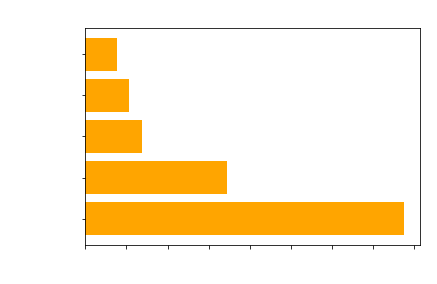

In [129]:
#VISUALISASI EDA 1
plt.barh(y=data_penjualan['customer_city'], width=data_penjualan['order_id'], color='orange')
plt.title('DATA PENJUALAN 5 KOTA', color='white', size=20)
plt.xticks(rotation=30, color='white')
plt.yticks(color='white', size=10)

# Explore:

In [130]:
#EDA 2
#Mengidentifikasi status penjualan tiap kota
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how='left',
    left_on= customers_df['customer_id'],
    right_on= orders_df['customer_id']
)
status_penjualan = customers_orders_df.groupby(by='order_status').customer_id_x.count().reset_index(0)
status_penjualan.rename(columns={
    'customer_id_x':'customer_id(count)'
}, inplace=True)
status_penjualan

,order_status,customer_id(count)
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


# VISUALISASI

Text(0.5, 1.0, 'STATUS PENJUALAN(SEKARANG)')

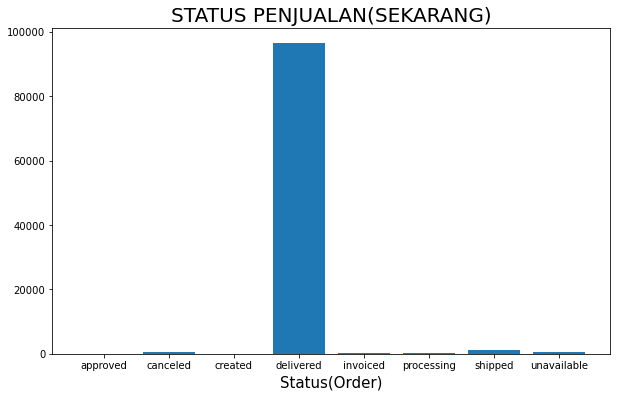

In [131]:
#VISUALISASI EDA 2
plt.figure(figsize=(10, 6))
plt.bar(x= status_penjualan['order_status'], height=status_penjualan['customer_id(count)'])
plt.xticks(color='black')
plt.xlabel('Status(Order)', color='black', size=15)
plt.yticks(color='black')
plt.title('STATUS PENJUALAN(SEKARANG)', color='black', size=20)

In [133]:
customers_orders_df.to_csv('proyek_data_analyst.csv', index=False)